## Importacion de librerias

In [32]:
post.transaction("""CREATE TABLE IF NOT EXISTS node_data(
	                 id serial Primary Key,
	                 sampletime TIME
	                    )""")
                    
post.transaction("""CREATE TABLE IF NOT EXISTS temperature (
                     id serial Primary Key,
	                 node_data_id INTEGER NOT NULL,
	                 temperature DECIMAL(5,2),
	                 alarm BOOL,
	                 CONSTRAINT fk_node_data
	                 FOREIGN KEY (node_data_id)
	                 REFERENCES node_data (id)
	                 ON DELETE CASCADE
            	     ON UPDATE CASCADE
                    )""")
        
post.transaction("""CREATE TABLE IF NOT EXISTS humidity (
                     id serial Primary Key,
	                 node_data_id INTEGER NOT NULL,
	                 humidity DECIMAL(5,2),
	                 alarm BOOL,
	                 CONSTRAINT fk_node_data
	                 FOREIGN KEY (node_data_id)
	                 REFERENCES node_data (id)
	                 ON DELETE CASCADE
            	     ON UPDATE CASCADE
                    )""")

'escritura completa'

In [2]:

from database.connection import * 
from service import Service
from entities.node import * 
from other.extract_data import *
import serial

servicio = Service(post)
servicio.getAll()

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime
0,1,10:40:40.255471
1,2,10:41:19.110536
2,3,10:42:07.329653
3,4,10:42:49.546320
4,5,10:43:31.749672
5,6,10:44:17.979811
6,7,10:45:02.188256
7,8,10:45:46.427080
8,9,10:46:32.654381
9,10,10:47:16.877925


In [3]:
datos = servicio.getOneById(8)
datos

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime,id,node_data_id,temperature,alarm,id,node_data_id,humidity,alarm
0,8,10:45:46.427080,174,8,118.0,True,136,8,4.0,False
1,8,10:45:46.427080,174,8,118.0,True,137,8,241.0,True
2,8,10:45:46.427080,174,8,118.0,True,138,8,168.0,True
3,8,10:45:46.427080,174,8,118.0,True,139,8,18.0,False
4,8,10:45:46.427080,174,8,118.0,True,140,8,69.0,True
...,...,...,...,...,...,...,...,...,...,...
1922,8,10:45:46.427080,220,8,151.0,True,172,8,124.0,True
1923,8,10:45:46.427080,220,8,151.0,True,173,8,27.0,True
1924,8,10:45:46.427080,220,8,151.0,True,174,8,239.0,True
1925,8,10:45:46.427080,220,8,151.0,True,175,8,97.0,True


<function matplotlib.pyplot.show(close=None, block=None)>

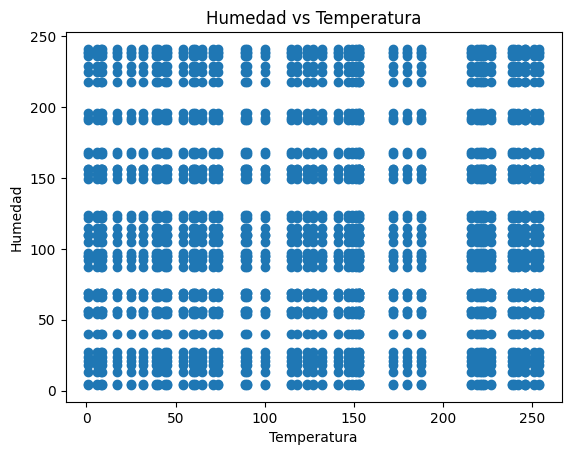

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.scatter(datos['temperature'],datos['humidity'])
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Humedad vs Temperatura')
plt.show

In [30]:
datos1 = servicio.getAllTemperatures()
datos2 = datos1.head(70)
datos2

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime,id,node_data_id,temperature,alarm
0,1,10:40:40.255471,1,1,118.0,True
1,1,10:40:40.255471,2,1,222.0,True
2,1,10:40:40.255471,3,1,39.0,True
3,1,10:40:40.255471,4,1,1.0,False
4,1,10:40:40.255471,5,1,61.0,True
...,...,...,...,...,...,...
65,5,10:43:31.749672,66,5,118.0,True
66,5,10:43:31.749672,67,5,222.0,True
67,5,10:43:31.749672,68,5,39.0,True
68,5,10:43:31.749672,69,5,1.0,False


<Axes: title={'center': 'Temperatura'}, xlabel='sampletime', ylabel='count'>

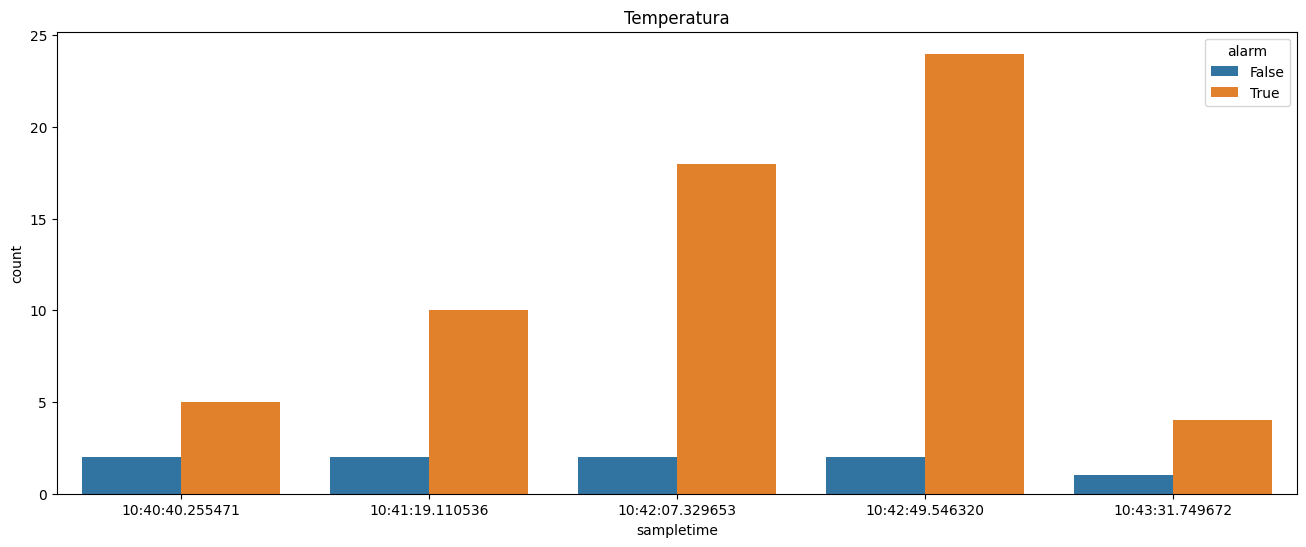

In [41]:
plt.figure(figsize=(16,6))
plt.title('Temperatura')
sb.countplot(x="sampletime", data=datos2, hue="alarm")

In [37]:
datos3 = servicio.getAllHumidity()
datos4 = datos3.head(70)
datos4

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime,id,node_data_id,humidity,alarm
0,1,10:40:40.255471,1,1,4.0,False
1,1,10:40:40.255471,2,1,241.0,True
2,1,10:40:40.255471,3,1,168.0,True
3,1,10:40:40.255471,4,1,18.0,False
4,2,10:41:19.110536,5,2,4.0,False
...,...,...,...,...,...,...
65,5,10:43:31.749672,66,5,21.0,True
66,5,10:43:31.749672,67,5,66.0,True
67,5,10:43:31.749672,68,5,110.0,True
68,5,10:43:31.749672,69,5,149.0,True


Text(0.5, 1.0, 'Humedad')

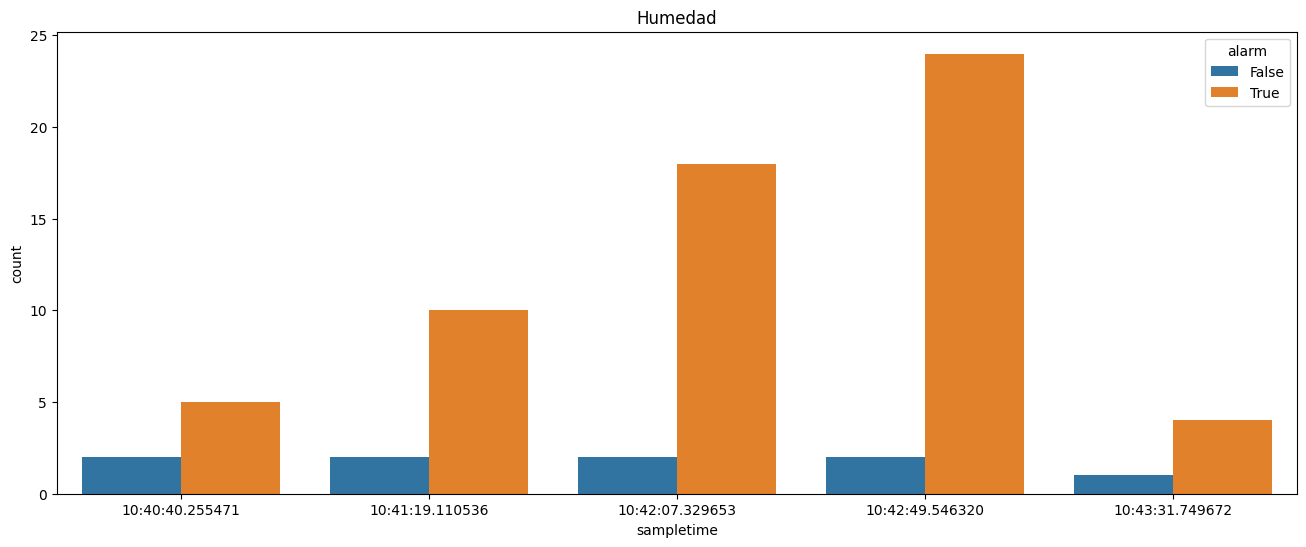

In [40]:

plt.figure(figsize=(16,6))
sb.countplot(x="sampletime", data=datos2, hue="alarm")
plt.title('Humedad')